***
# 2.1 Categorical rhythm for Bird 5_Internal Consistency Test
### JX, 03/08/2022
***
    Bird5:
    LS110131.10.9.2015GeoPool.aiff
    LS110136.10.10.2015GeoGreens.aiff
    LS110143.10.12.2015GeoGreens.aiff
    LS110146A.10.13.2015GeoGreens.aiff
    
***

## Specify Locations

In [1]:
from butcherbird.utils.paths import DATA_DIR

In [2]:
indv = "Bird5"

In [3]:
SAVE_LOC = DATA_DIR/'interim/raw_spectrogram/butcherbird_note_df.pickle'

## Load in Data

In [4]:
import pandas as pd

In [5]:
note_df = pd.read_pickle(SAVE_LOC)

In [6]:
indv_df = note_df[note_df['indv'] == indv].reset_index()

In [7]:
indv_df.head()

,index,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,0,513.78,517.061923,3.281923,15,0,513.780000,513.905214,0.125214,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -7.356902671940375e-05, -0.000162745769...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,0,513.78,517.061923,3.281923,15,1,513.917747,513.980936,0.063188,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 0.0014728324725323874, 0.002769917049663...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,0,513.78,517.061923,3.281923,15,2,514.170000,514.480698,0.310698,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 4.4531726447127805e-05, 4.62385657049665...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,0,513.78,517.061923,3.281923,15,3,514.620783,515.310000,0.689217,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -3.2631556531601904e-06, -7.44037823939...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,0,513.78,517.061923,3.281923,15,4,515.355217,515.660180,0.304964,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -2.958346783314775e-05, -7.119856074752...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Split into recordings

In [8]:
import numpy as np

In [9]:
recs = [indv_df[indv_df['key'] == key] for key in np.unique(indv_df['key'].values)]

In [10]:
len(recs)

4

## Calculate Empirical Rhythm

In [11]:
import butcherbird.rhythm as rhythm
import seaborn as sns

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:163: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [12]:
dyadics = []

for rec in recs:
    dyadics.append(
        rhythm.construct_rhythm_df(
            rec,
            'indv'
        )
    )

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/373 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/489 [00:00<?, ?it/s]

## Draw Figure

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR
from tqdm.autonotebook import tqdm

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

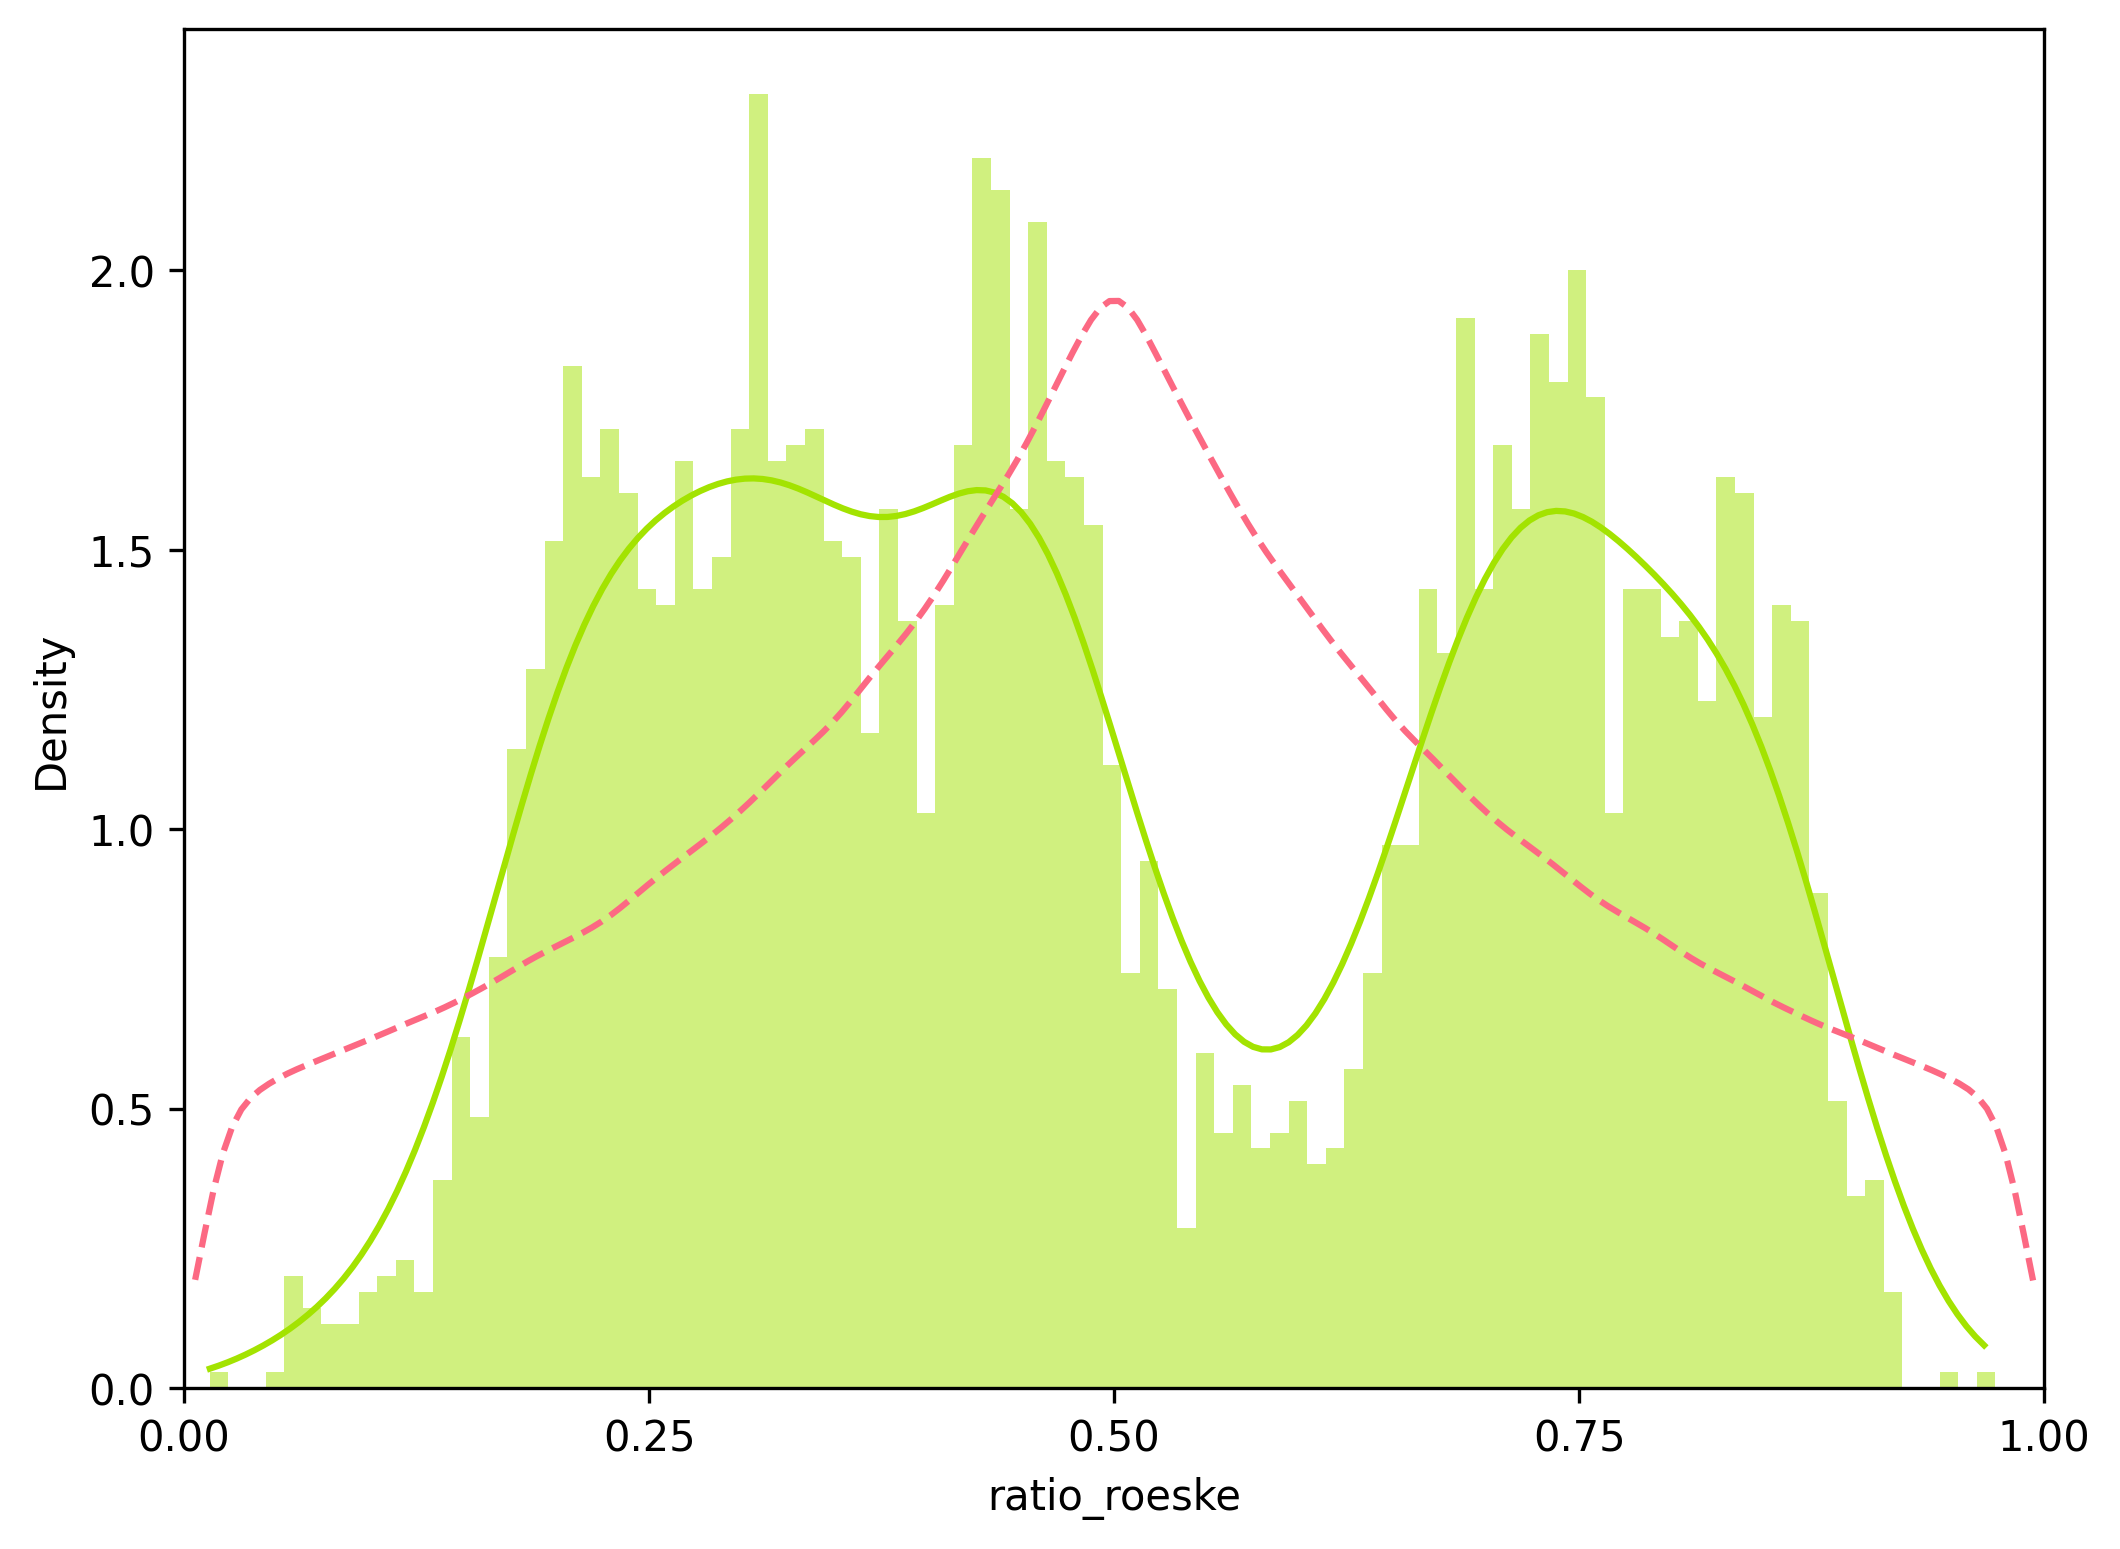

  0%|          | 0/1000 [00:00<?, ?it/s]

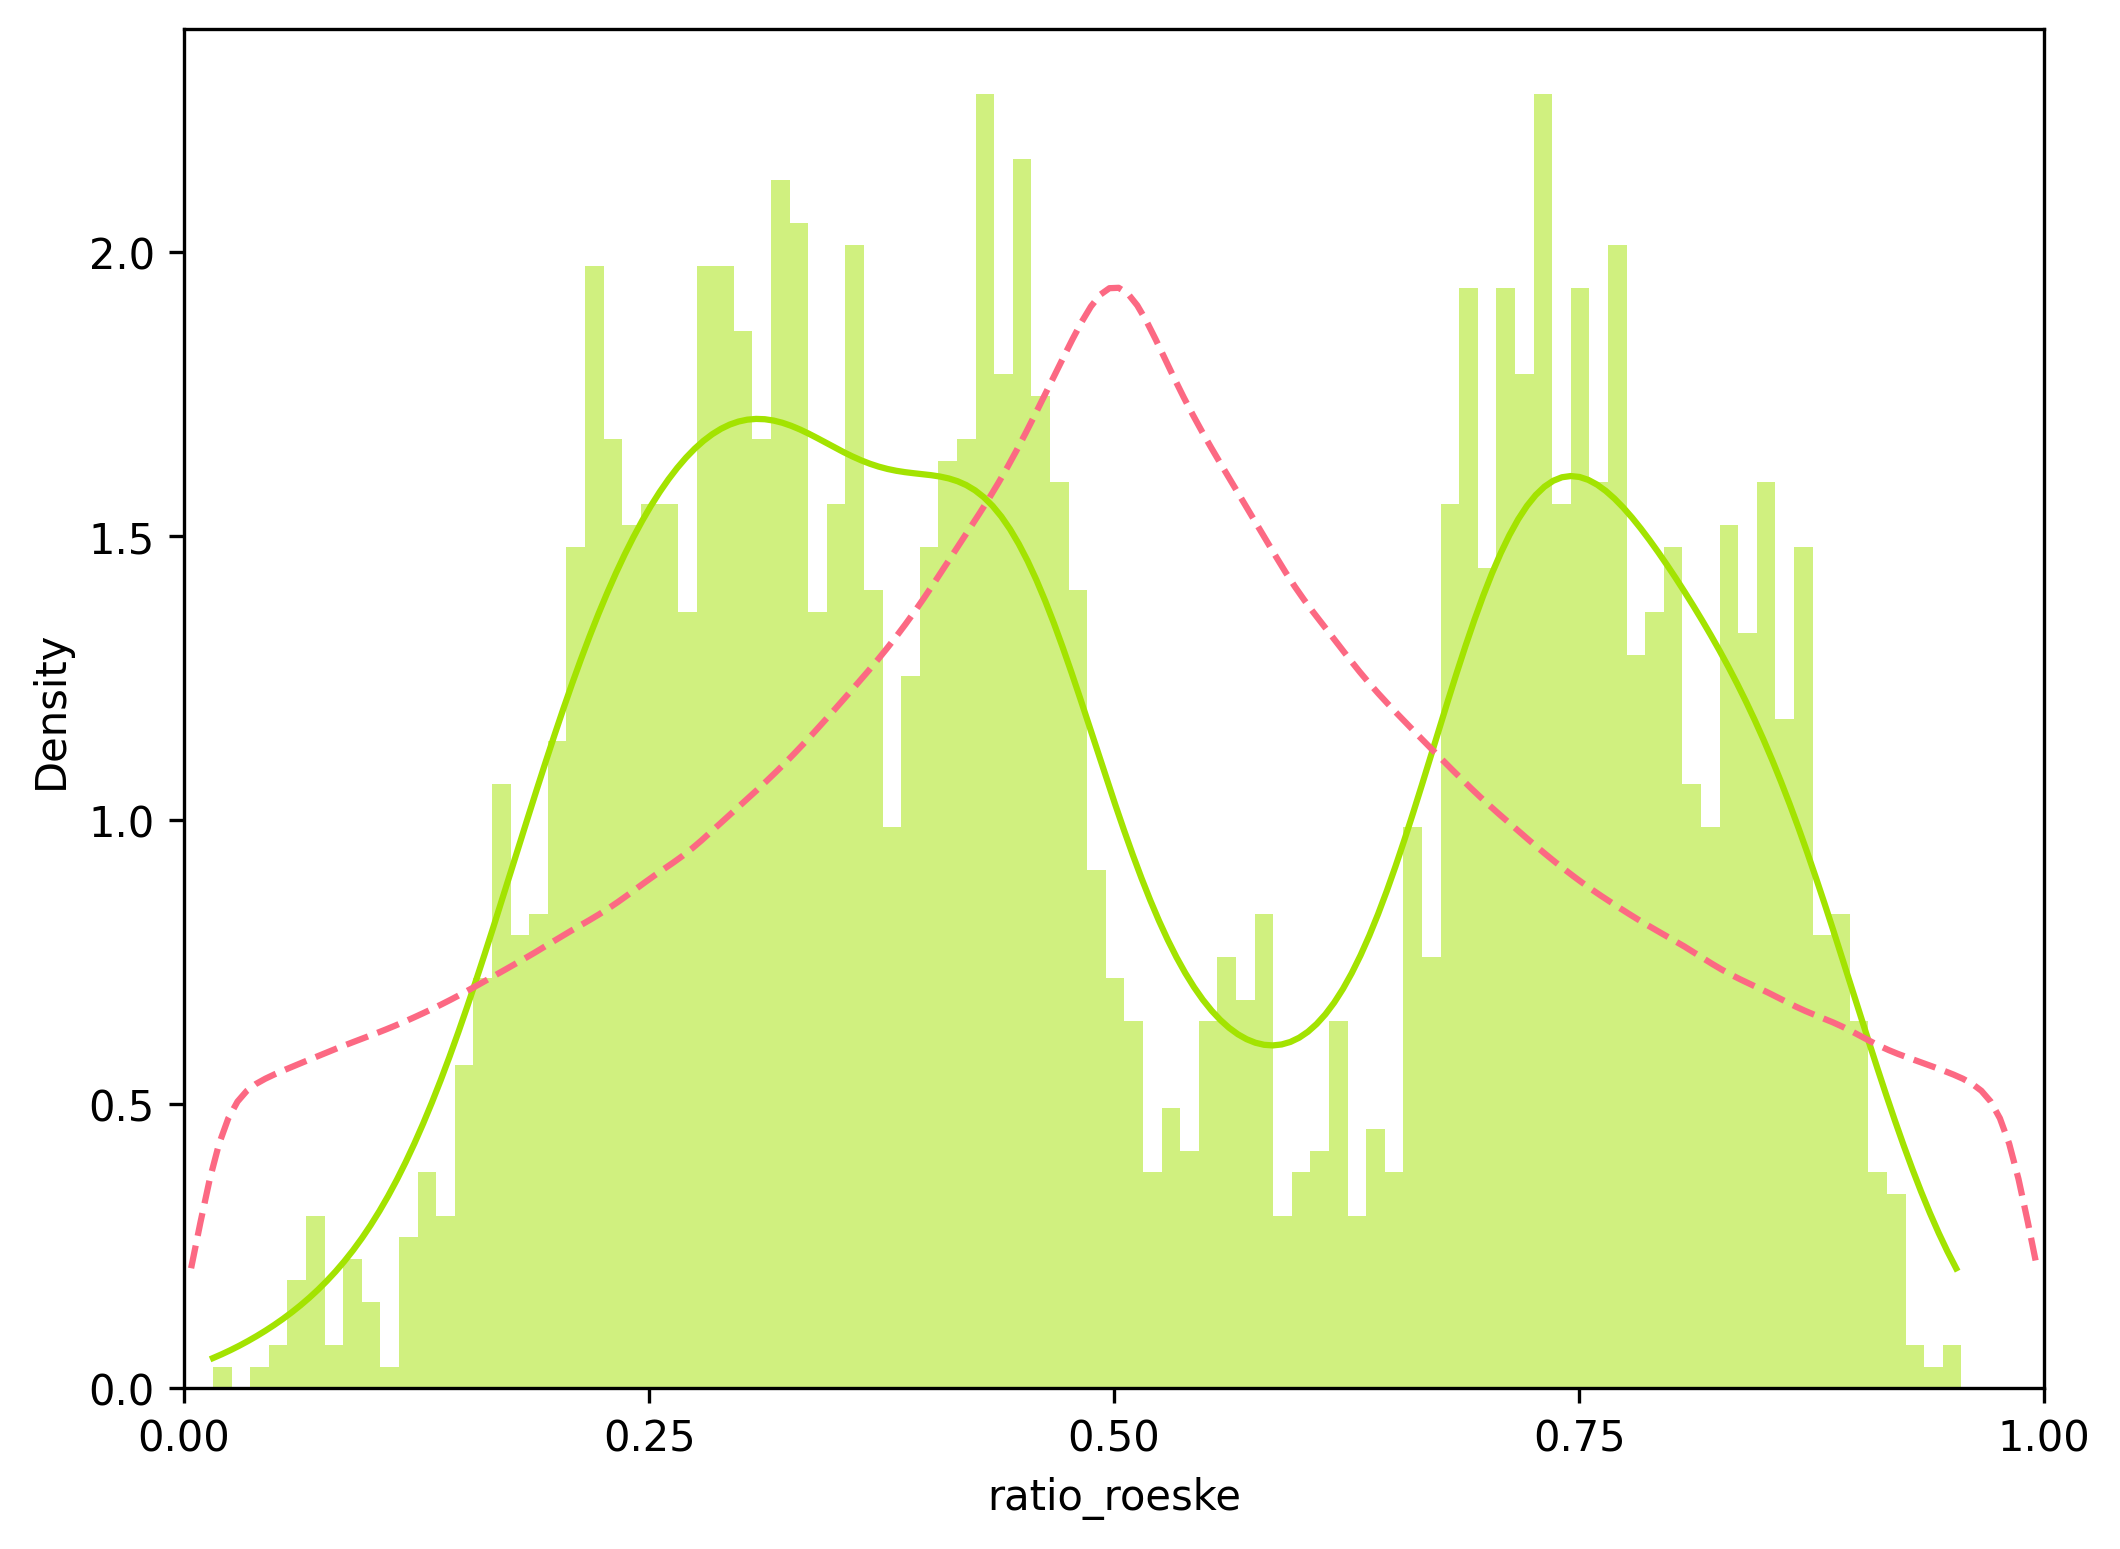

  0%|          | 0/1000 [00:00<?, ?it/s]

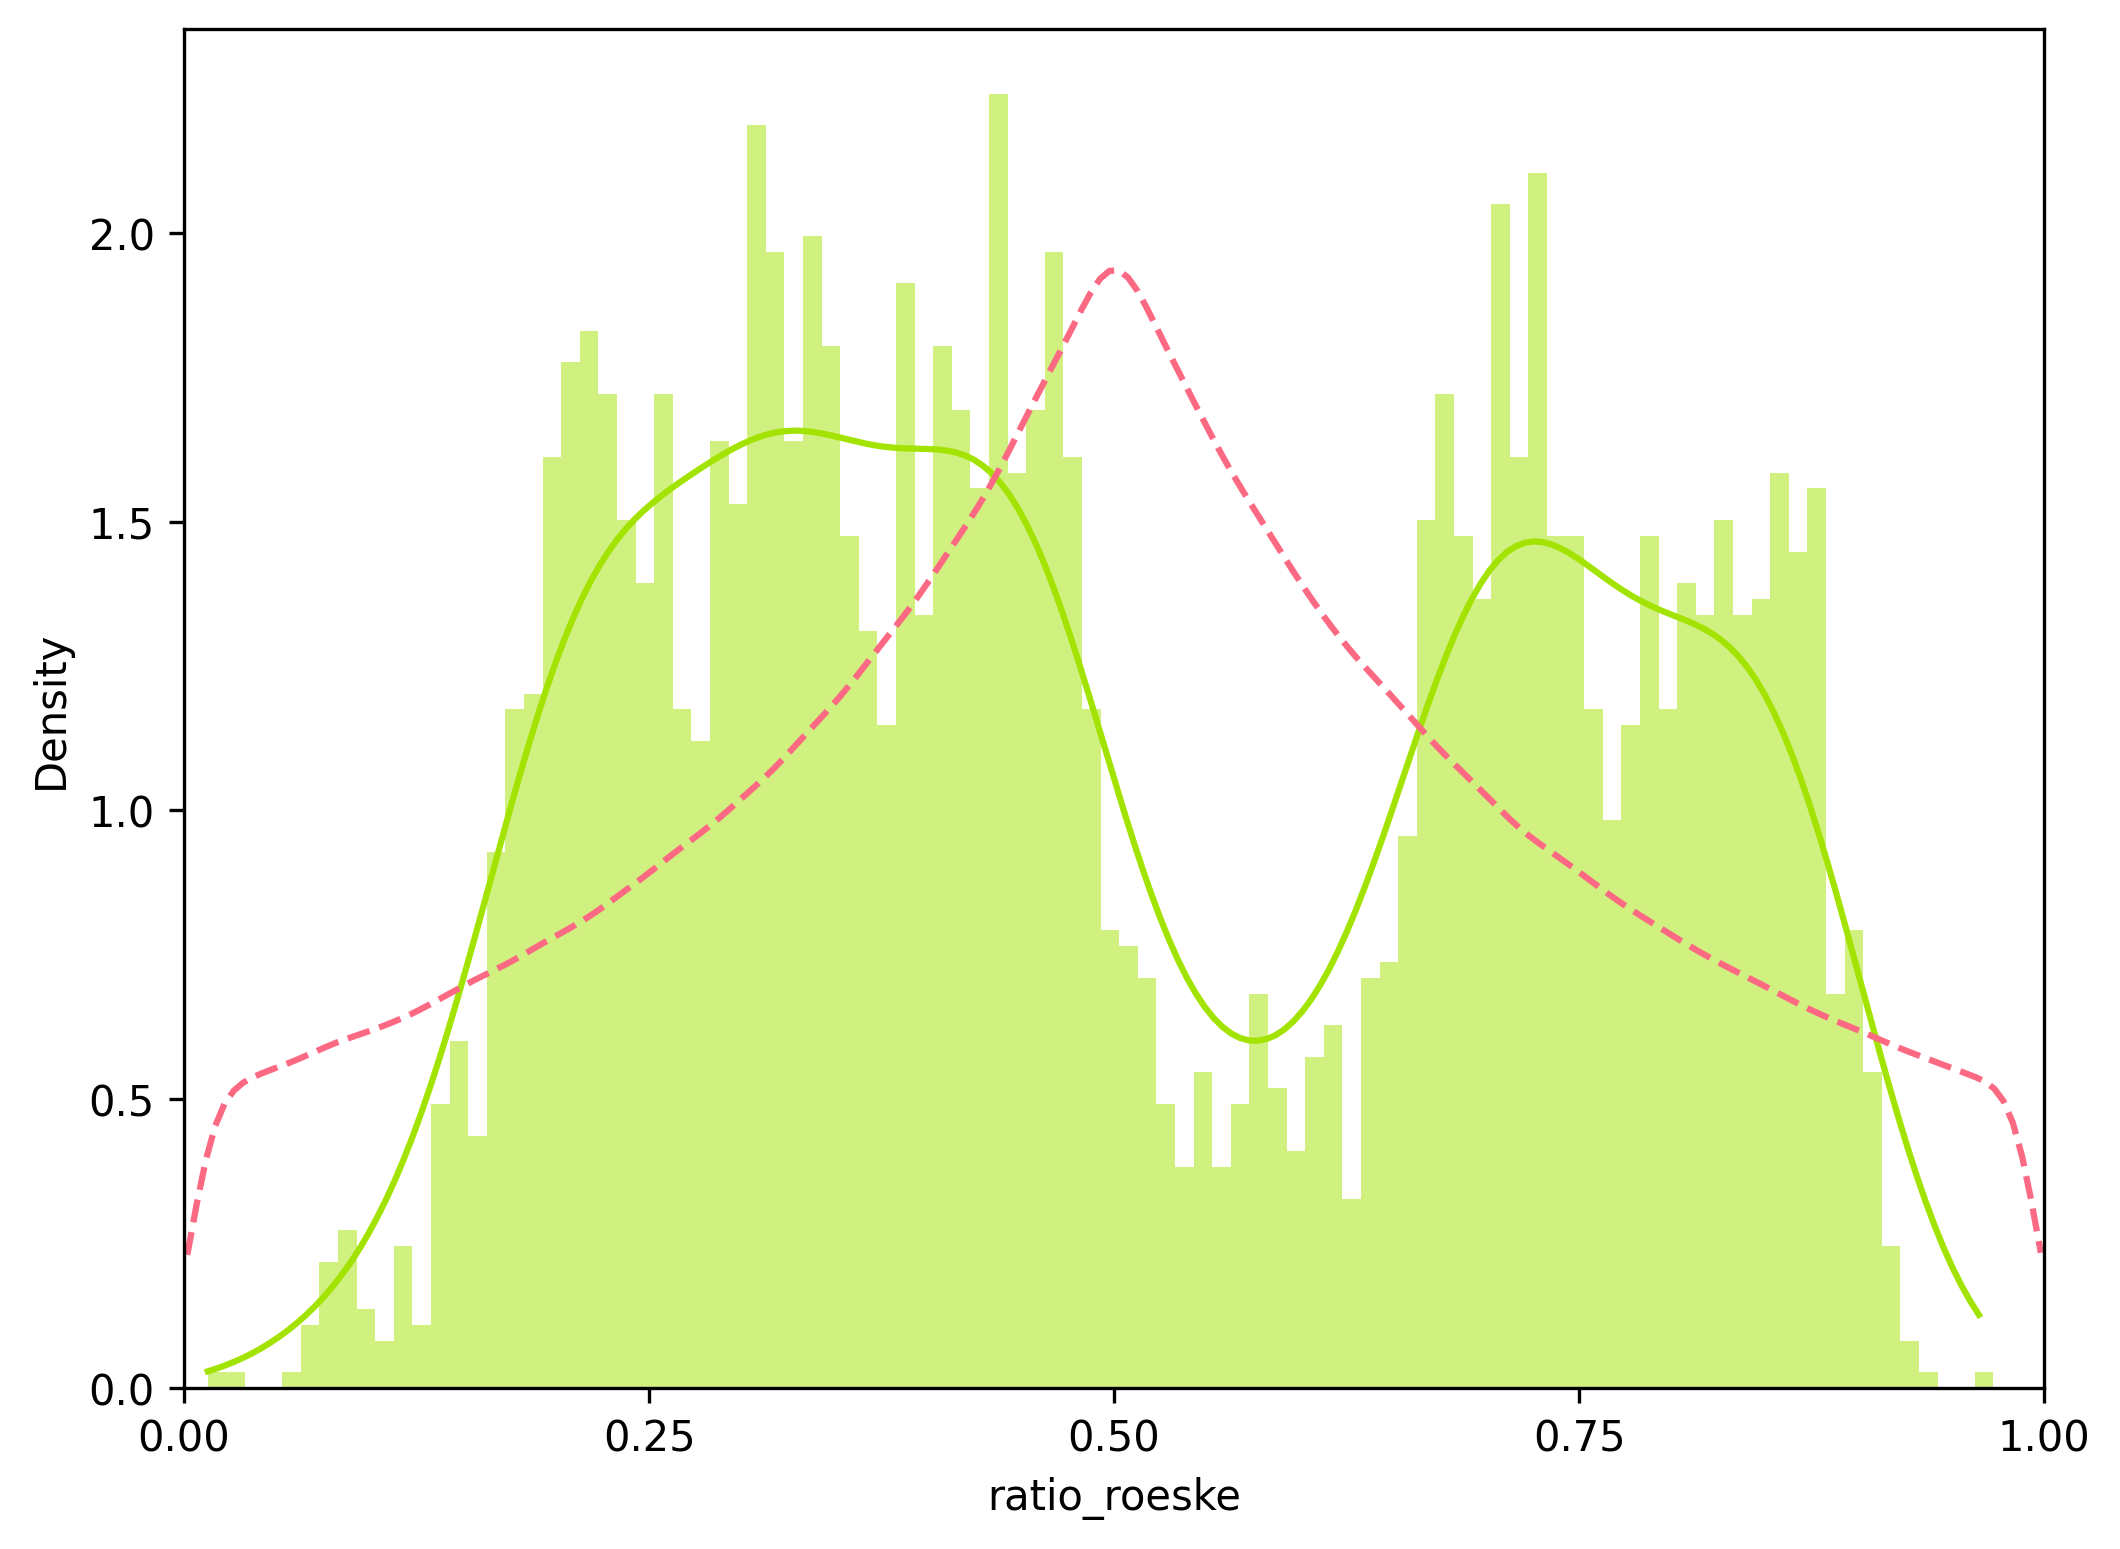

  0%|          | 0/1000 [00:00<?, ?it/s]

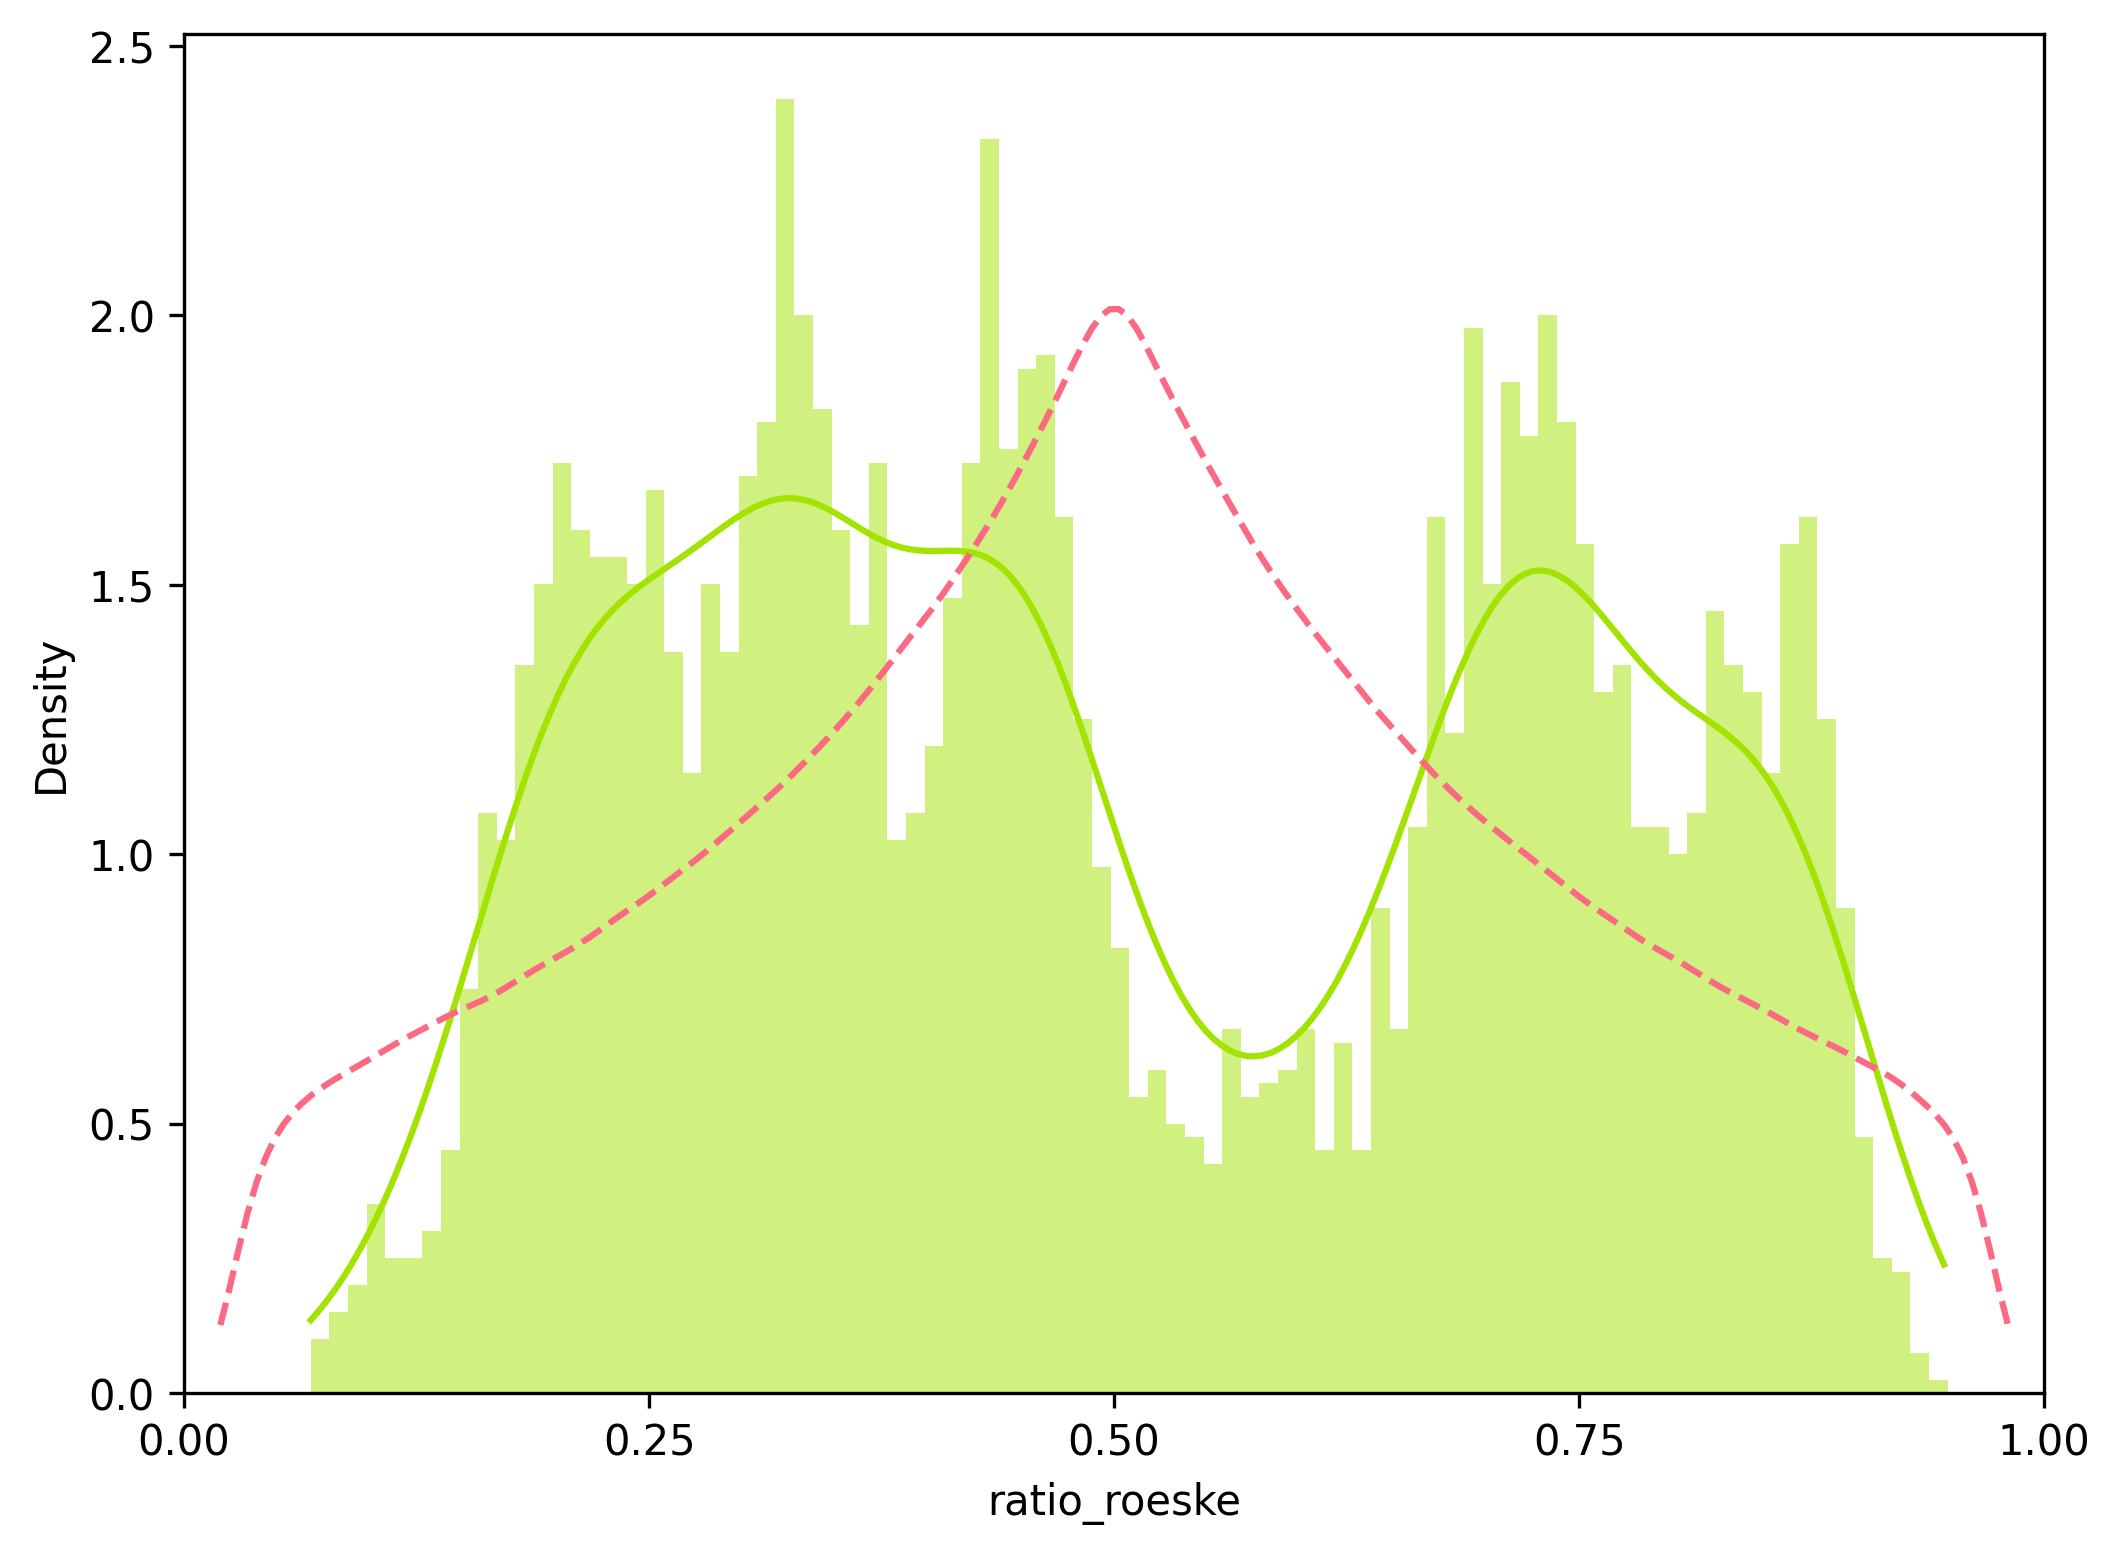

In [14]:
counter = 0
for dyadic in tqdm(dyadics):
    
    figure(figsize = (8, 6), dpi = 300)

    plt.rcParams['patch.edgecolor'] = 'none'

    ## create uniform distribution
    n = 1000
    import numpy as np
    import numpy.random as random
    interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
    interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])
    df_uni = []
    for i in tqdm(np.arange(0, n)):
        interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
        interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
        df_uni.append(interval1_uni / (interval1_uni + interval2_uni))
    uni_ratio = np.array(df_uni).flatten()
    
    fig = sns.histplot(
        x = dyadic['ratio_roeske'],
        binwidth = 0.01,
        stat = 'density',
        color = '#A3E301',
        fill = '#A3E301',
        kde = True,
    )
    
    uni = sns.histplot(
        x = uni_ratio,
        stat = 'density',
        alpha = 0,
        color = '#FC6983',
        kde = True,
        line_kws = dict(linestyle = 'dashed')
    )

    ax = plt.gca()
    ax.set_xlim([0, 1])
    plt.xticks(np.arange(0, 1.25, 0.25))

    # save
    figname = 'fig1_' + 'categorical_rhythm_internal_consistency' + indv + str(counter) + '.pdf'
    plt.savefig(FIGURE_DIR/'categorical_rhythm'/figname)
    plt.show()
    
    counter = counter + 1

## Calculate Hopkins Statistics and confidence intervals

In [15]:
from butcherbird.rhythm import hopkins
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed

In [16]:
h_iterations = 100
shuffle_iterations = 100
n_jobs = 36

In [17]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
SDoHList = []

## empirical
for dyadic in dyadics:
    SDoH = []

    for i in tqdm(range(0, h_iterations)):
        SDoH.append(hopkins(dyadic[['ratio_roeske']]))

    ## take mean of sampling distribution of Hopkins as best estimate
    SDoHList.append(mean_confidence_interval(SDoH))
    
SDoHList

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]